Missing Values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64
Dataset Overview:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000         150.00000         150.000000   
mean            5.843333           3.05400           3.758000   
std             0.828066           0.42539           1.765298   
min             4.300000           2.05000           1.000000   
25%             5.100000           2.80000           1.600000   
50%             5.800000           3.00000           4.350000   
75%             6.400000           3.30000           5.100000   
max             7.900000           4.05000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


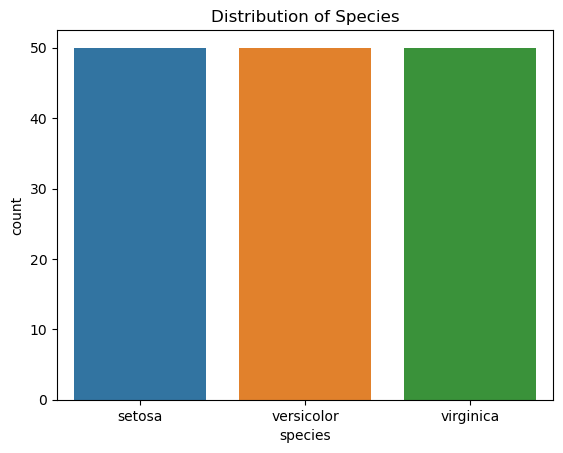

C:\Users\ujjva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ujjva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ujjva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ujjva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

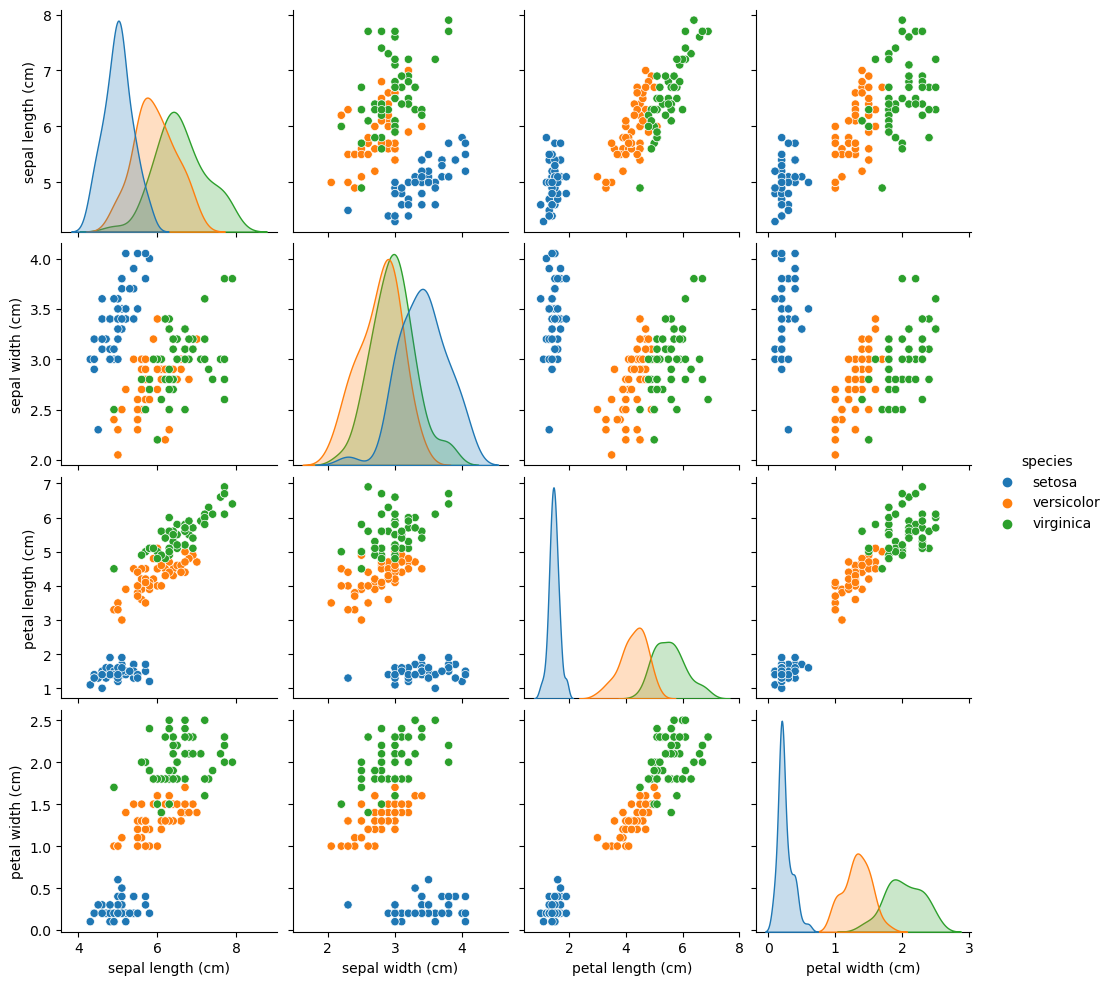

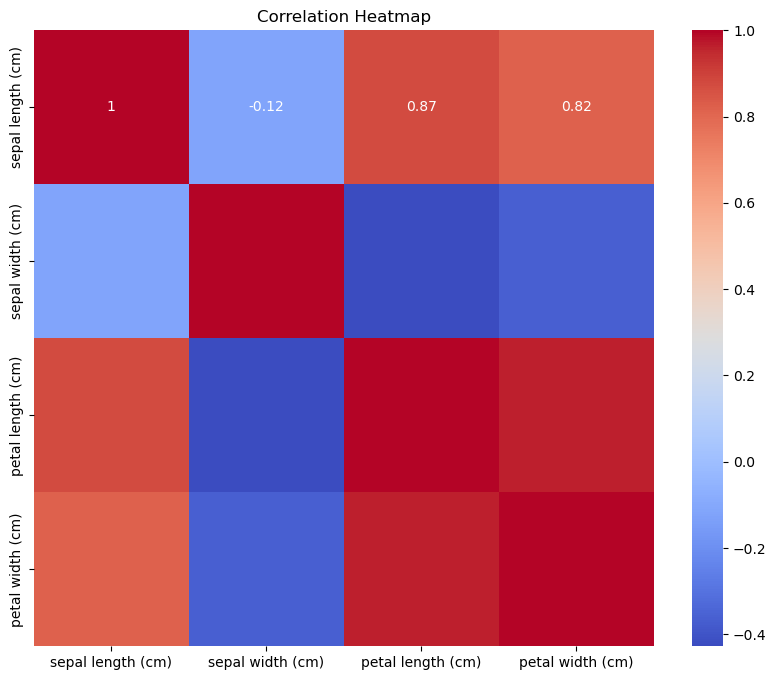

Average Sepal Length by Species:
 species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal length (cm), dtype: float64


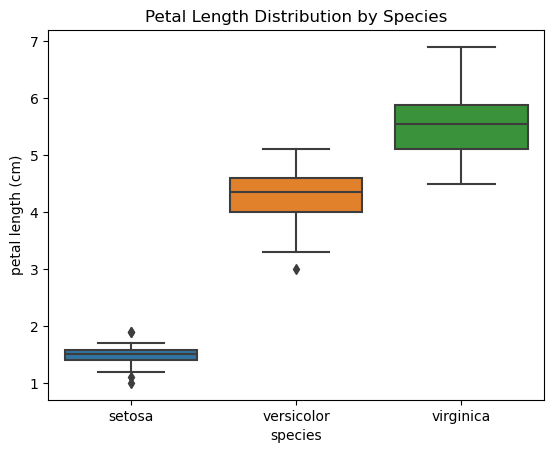

Features most correlated with Petal Width:
 petal width (cm)     1.000000
petal length (cm)    0.962865
sepal length (cm)    0.817941
sepal width (cm)    -0.365317
Name: petal width (cm), dtype: float64


C:\Users\ujjva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


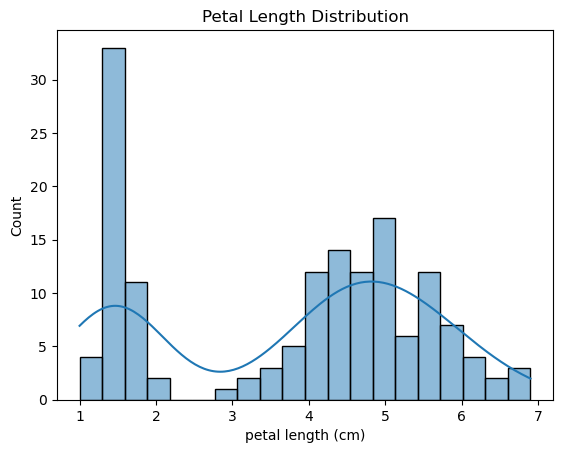

Accuracy Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

# Step 1: Load Iris Dataset
# Using sklearn's built-in Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Adding the target variable (species)
df['species'] = iris.target

# Mapping numeric species to string names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Step 2: Data Cleaning
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# No missing values in Iris dataset, but let's handle outliers for numeric features
for col in df.select_dtypes(include=['float64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

# Step 3: Exploratory Data Analysis (EDA)
# Summary statistics
print("Dataset Overview:\n", df.describe())

# Distribution of species
sns.countplot(x='species', data=df)
plt.title('Distribution of Species')
plt.show()

# Pairplot to explore relationships between features
sns.pairplot(df, hue='species')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

# Step 4: Questions and Analysis
# 1. Average sepal length by species
avg_sepal_length = df.groupby('species')['sepal length (cm)'].mean()
print("Average Sepal Length by Species:\n", avg_sepal_length)

# 2. Petal length distribution by species
sns.boxplot(x='species', y='petal length (cm)', data=df)
plt.title('Petal Length Distribution by Species')
plt.show()

# 3. Feature most correlated with petal width
corr_with_petal_width = df.drop('species', axis=1).corr()['petal width (cm)'].sort_values(ascending=False)
print("Features most correlated with Petal Width:\n", corr_with_petal_width)

# Step 5: Data Visualization
# Histogram for petal length distribution
sns.histplot(df['petal length (cm)'], bins=20, kde=True)
plt.title('Petal Length Distribution')
plt.show()

# Step 6: Predictive Modeling
# Splitting the dataset into training and test sets
X = df.drop(['species'], axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
6